In [4]:
!pip install xgboost
!pip install shap

import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [5]:
fTest = pd.read_csv('Resources/test.csv')
fTest = fTest.sample(50000)
fTest

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
183697,test_183697,5.8936,1.4003,9.7748,8.7808,9.4409,-11.4355,5.0149,19.2302,0.6198,...,3.8351,9.8636,2.5487,7.1730,9.9041,0.1551,-7.6131,8.4240,20.2543,-15.3779
90331,test_90331,10.5359,-1.1600,9.0605,4.9526,10.1082,-5.1585,5.6477,14.4607,0.1925,...,4.9751,7.2822,4.6892,7.8688,23.2094,0.6477,11.7369,8.1271,17.2479,-11.0680
173666,test_173666,11.3565,2.6995,4.0328,10.4010,9.2446,13.2242,4.4926,20.9281,2.9554,...,3.3396,1.3051,1.9425,5.8109,18.4213,-1.7187,10.1719,8.9236,17.2766,10.3916
172153,test_172153,5.3132,-5.4735,10.2782,9.7141,9.5166,-3.3792,4.8115,15.9463,2.9134,...,7.9382,10.5613,2.1711,0.4973,20.3523,2.4020,5.9681,8.7156,14.5096,-19.9733
172727,test_172727,6.7991,0.4633,11.0560,6.2929,9.0508,-8.7639,6.1165,16.0270,-1.8497,...,3.5843,7.0254,0.2303,7.9305,14.1153,-0.8240,6.3531,9.9204,14.8296,1.7513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117273,test_117273,14.0555,-7.7623,14.2246,6.1441,9.3251,-16.6413,5.0013,15.7081,4.1972,...,5.2481,2.8209,3.0923,4.1481,23.2776,-3.1831,-2.9383,9.1170,15.6267,7.0430
30885,test_30885,15.0460,2.5852,14.6994,10.1710,8.8994,-6.6862,6.2813,21.1327,3.2051,...,2.4168,3.0555,4.2595,9.8069,17.4240,-2.1882,10.2263,7.2671,20.7959,4.0795
153739,test_153739,12.5784,-5.3721,8.7013,5.5754,10.1877,-8.2630,5.9341,18.7936,-4.5440,...,7.5904,6.0750,2.2288,1.8943,19.2729,1.7168,-0.7324,9.6525,20.7397,3.5371
17613,test_17613,7.9380,-3.3580,11.1712,7.8478,9.6923,-11.6053,6.2444,11.5855,-3.7739,...,10.9153,4.5356,3.9745,10.3333,18.4408,0.1167,-4.0591,7.7696,18.0833,-4.7145


In [6]:
dfTrain=pd.read_csv('Resources/train.csv')
dfTrain = dfTrain.sample(50000)
dfTrain

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
76053,train_76053,0,6.1746,0.1896,8.0000,3.9755,12.7023,-13.2292,5.3856,10.7742,...,0.6634,3.8223,1.7398,8.1613,11.0266,-0.5293,-3.6563,10.8589,18.8877,5.2782
105157,train_105157,0,11.0031,2.0752,14.5995,6.9524,11.6841,-2.5298,5.5544,16.7614,...,6.5111,8.9225,0.8184,-3.4338,19.9573,-1.9147,3.5604,7.3980,13.9310,-10.9939
184375,train_184375,0,12.0782,1.1832,8.9221,8.6682,11.9396,-2.9990,5.9041,11.5790,...,1.8597,10.3719,0.5658,-6.4513,16.0212,1.1806,-2.7462,9.3272,14.3877,-3.6027
146710,train_146710,0,7.8254,-7.6833,16.7554,7.2952,11.6108,-7.2911,4.2152,15.5135,...,6.9317,9.1227,0.8809,-0.3301,18.1472,-2.0875,-0.1007,10.4010,21.4416,-1.9232
147895,train_147895,0,5.0820,3.6126,7.9926,6.5213,10.4955,0.4677,4.7339,14.4896,...,9.0826,6.3178,2.9133,3.0619,15.5924,0.1557,1.7538,8.3661,17.5117,12.2335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104552,train_104552,0,10.0920,-3.6678,8.1694,3.9022,8.2331,1.3601,6.3873,17.9355,...,0.8723,3.6119,-0.8797,5.0029,22.1454,-0.2409,-1.7748,9.4318,16.2213,6.8033
122352,train_122352,0,10.1611,-3.8427,8.3499,4.2259,8.4753,-3.8274,5.8077,18.1860,...,-2.4872,7.4435,2.7381,-0.1758,20.8029,1.0387,11.5216,9.0240,19.4155,10.0313
111221,train_111221,1,13.5195,-0.5262,10.8411,10.1229,11.9863,-0.3415,5.9303,21.5109,...,7.6032,4.6883,2.6085,1.7638,18.7501,-1.8149,-4.6690,9.3958,14.0084,-27.0804
108653,train_108653,0,10.6649,-2.7826,7.6488,3.9324,13.9469,-0.6076,6.9866,13.9863,...,8.4228,13.5208,4.3665,1.2266,19.3141,0.6874,-0.4535,9.3959,18.4719,14.8873


In [7]:
var_columns = [c for c in dfTrain.columns if c not in ['ID_code', 'target']]
X = dfTrain.loc[:, var_columns]
y = dfTrain.loc[:, 'target']
X_train, X_valid, y_train, y_valid = train_test_split (X,y, test_size=.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((40000, 200), (10000, 200), (40000,), (10000,))

In [8]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
model_xgboost = xgb.XGBClassifier(learning_rate=.03,
                                     max_depth=6,
                                     n_estimators=100,
                                     gamma=0,
                                     reg_lambda=1,
                                     subsample=1,
                                     colsample_bytree=1,
                                     eval_metric='auc',
                                     verbosity=1,
                                     random_state=1)

eval_set =[(X_valid, y_valid)]

model_xgboost.fit(X_train,
                 y_train,
                 early_stopping_rounds=10,
                 eval_set=eval_set,
                 verbose=True)

C:\Users\mjenk\Anaconda3\envs\dev\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.64075
[1]	validation_0-auc:0.65528
[2]	validation_0-auc:0.65787
[3]	validation_0-auc:0.66015
[4]	validation_0-auc:0.66622
[5]	validation_0-auc:0.66630
[6]	validation_0-auc:0.67283
[7]	validation_0-auc:0.67576
[8]	validation_0-auc:0.68035
[9]	validation_0-auc:0.68147
[10]	validation_0-auc:0.68538
[11]	validation_0-auc:0.68646
[12]	validation_0-auc:0.69431
[13]	validation_0-auc:0.69716
[14]	validation_0-auc:0.70242
[15]	validation_0-auc:0.70430
[16]	validation_0-auc:0.70698
[17]	validation_0-auc:0.71271
[18]	validation_0-auc:0.71431
[19]	validation_0-auc:0.71511
[20]	validation_0-auc:0.71616
[21]	validation_0-auc:0.71950
[22]	validation_0-auc:0.72074
[23]	validation_0-auc:0.72278
[24]	validation_0-auc:0.72346
[25]	validation_0-auc:0.72603
[26]	validation_0-auc:0.72879
[27]	validation_0-auc:0.72932
[28]	validation_0-auc:0.73245
[29]	validation_0-auc:0.73287
[30]	validation_0-auc:0.73362
[31]	validation_0-auc:0.73583
[32]	validation_0-auc:0.73660
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

# Evaluate Model Performance

In [10]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid {:.4f}".format(roc_auc_score(y_train, y_train_pred), roc_auc_score(y_valid,y_valid_pred)))

AUC Train: 0.9347
AUC Valid 0.8001


# Hyperparameter Tuning

In [12]:
learning_rate_list = [0.02, 0.08, 0.5]
max_depth_list = [3, 6, 10]
n_estimators_list = [100,500]
gamma = [4,8]
reg_lambda_list = [0.05, 0.08, 0.5, 0.8]

#Booster param is set to default 


params_dict = {
    'learning_rate': learning_rate_list,
    'max_depth': max_depth_list,
    'n_estimators': n_estimators_list,
    'gamma': gamma,
    'reg_lambda': reg_lambda_list
   
}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v)

print(num_combinations)
params_dict

144


{'learning_rate': [0.02, 0.08, 0.5],
 'max_depth': [3, 6, 10],
 'n_estimators': [100, 500],
 'gamma': [4, 8],
 'reg_lambda': [0.05, 0.08, 0.5, 0.8]}

In [13]:
def my_roc_auc_score(model, X, y): 
    return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator = xgb.XGBClassifier(subsample=0.5, colsample_bytree=0.25, eval_metric='auc', use_label_encoder=False, ), param_grid=params_dict, cv=2, scoring=my_roc_auc_score, return_train_score=True, verbose=4)

model_xgboost_hp.fit(X,y)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.05; total time=   2.5s
[CV 2/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.05; total time=   2.5s
[CV 1/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.08; total time=   2.5s
[CV 2/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.08; total time=   2.4s
[CV 1/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.5; total time=   2.4s
[CV 2/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.5; total time=   2.5s
[CV 1/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.8; total time=   2.4s
[CV 2/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=100, reg_lambda=0.8; total time=   2.5s
[CV 1/2] END gamma=4, learning_rate=0.02, max_depth=3, n_estimators=5

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.5, tree_method=None,
                                     use_label_encoder=False,
                                     

In [46]:
results_table = pd.DataFrame(model_xgboost_hp.cv_results_)
results_table = results_table[['rank_test_score','mean_test_score', 'mean_train_score','param_learning_rate', 'param_gamma', 'param_n_estimators', 'param_reg_lambda', 'param_max_depth']]

results_table.sort_values(by='rank_test_score', inplace=True)
results_table.head(100)

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_gamma,param_n_estimators,param_reg_lambda,param_max_depth
101,1,0.878767,0.974104,0.08,8,500,0.08,3
103,2,0.878704,0.967929,0.08,8,500,0.8,3
28,3,0.878148,0.978871,0.08,4,500,0.05,3
31,4,0.878125,0.974953,0.08,4,500,0.8,3
29,5,0.877514,0.978733,0.08,4,500,0.08,3
...,...,...,...,...,...,...,...,...
121,96,0.817307,0.948925,0.5,8,100,0.08,3
10,97,0.817172,0.941836,0.02,4,100,0.5,6
11,98,0.816715,0.940352,0.02,4,100,0.8,6
82,99,0.815176,0.929102,0.02,8,100,0.5,6


In [47]:
# plot = pd.read_csv('C:/Users/mjenk/Desktop/model3_results.csv')
plot = results_table.sort_values(by='param_n_estimators')


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

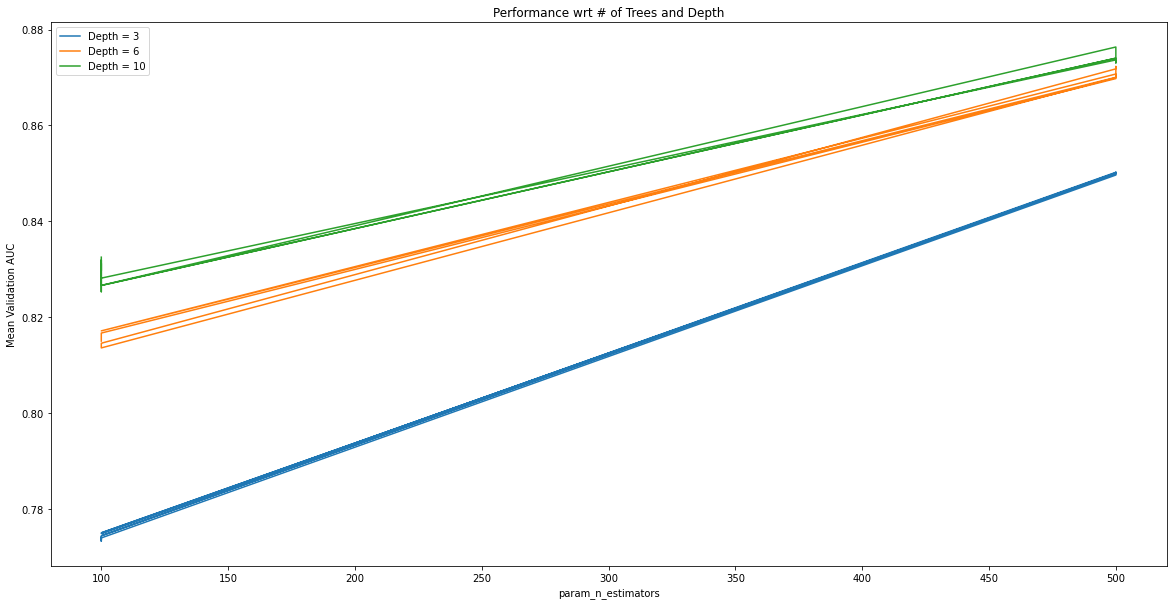

In [83]:
# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = plot.loc[(plot['param_learning_rate']==0.02) & (plot['param_max_depth']==3),:]
lr_d3 = plot.loc[(plot['param_learning_rate']==0.02) & (plot['param_max_depth']==6),:]
lr_d4 = plot.loc[(plot['param_learning_rate']==0.02) & (plot['param_max_depth']==10),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(20,10))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth = 3', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth = 6', ax=ax)
lr_d4.plot(x='param_n_estimators', y='mean_test_score', label='Depth = 10', ax=ax)
plt.ylabel('Mean Validation AUC')
# plt.xlabel('N-Estimators')
plt.title('Performance wrt # of Trees and Depth')

In [89]:

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = plot.loc[(plot['param_learning_rate']==0.05) & (plot['param_num_parallel_tree']==1),:]
lr_d3 = plot.loc[(plot['param_learning_rate']==0.05) & (plot['param_num_parallel_tree']==3),:]
lr_d5 = plot.loc[(plot['param_learning_rate']==0.05) & (plot['param_num_parallel_tree']==5),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='PTree=1', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='PTree=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='PTree=5', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Parallel Trees')

KeyError: 'param_num_parallel_tree'

In [20]:
# results_table.to_csv("C:/Users/mjenk/Desktop/model3_results.csv")

In [66]:
# Beginning Final Model

model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.08,
                                          max_depth=3,
                                          n_estimators=5000,
                                          gamma=8,
                                          reg_lambda=0.08,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.56554	validation_1-auc:0.57283
[1]	validation_0-auc:0.62296	validation_1-auc:0.61780
[2]	validation_0-auc:0.65090	validation_1-auc:0.64830
[3]	validation_0-auc:0.66941	validation_1-auc:0.67085
[4]	validation_0-auc:0.69200	validation_1-auc:0.68787
[5]	validation_0-auc:0.71606	validation_1-auc:0.71103
[6]	validation_0-auc:0.72845	validation_1-auc:0.72467
[7]	validation_0-auc:0.73686	validation_1-auc:0.73231
[8]	validation_0-auc:0.74326	validation_1-auc:0.73238
[9]	validation_0-auc:0.74858	validation_1-auc:0.73491
[10]	validation_0-auc:0.75394	validation_1-auc:0.73884
[11]	validation_0-auc:0.76118	validation_1-auc:0.74508
[12]	validation_0-auc:0.75791	validation_1-auc:0.74586
[13]	validation_0-auc:0.76167	validation_1-auc:0.74456
[14]	validation_0-auc:0.76261	validation_1-auc:0.74390
[15]	validation_0-auc:0.76714	validation_1-auc:0.74650
[16]	validation_0-auc:0.76965	validation_1-auc:0.74586
[17]	validation_0-auc:0.76776	validation_1-auc:0.74236
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=8, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.08,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=1)

In [67]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.9678
AUC Valid: 0.8856


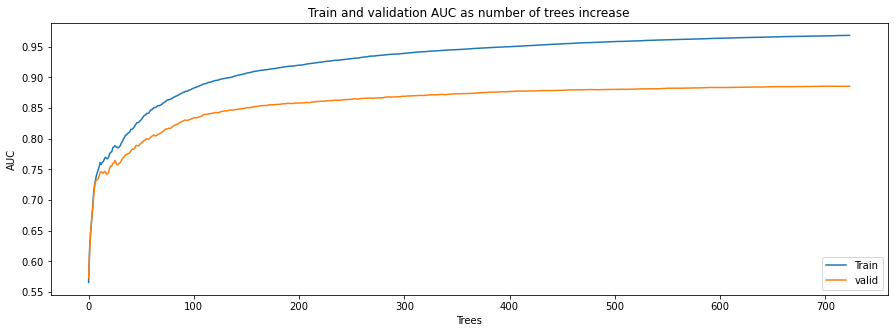

In [68]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [71]:
df_var_imp = pd.DataFrame({"Variable": var_columns,
                           "Importance": model_xgboost_fin.feature_importances_}) \
                        .sort_values(by='Importance', ascending=False)
df_var_imp[:10]

,Variable,Importance
81,var_81,0.012175
26,var_26,0.009051
12,var_12,0.008451
53,var_53,0.008449
179,var_179,0.008422
139,var_139,0.008407
109,var_109,0.008162
190,var_190,0.008021
110,var_110,0.007970
146,var_146,0.007644


In [75]:
df_test = pd.read_csv('Resources/test.csv')
df_sample_submissions = pd.read_csv('Resources/sample_submission.csv')
df_test.shape, df_sample_submissions.shape

((200000, 201), (200000, 2))

In [77]:
X_test = df_test.loc[:, var_columns]

df_sample_submissions['target'] = model_xgboost_fin.predict_proba(X_test)[:,1]
df_sample_submissions


,ID_code,target
0,test_0,0.165344
1,test_1,0.145415
2,test_2,0.194359
3,test_3,0.272460
4,test_4,0.088241
...,...,...
199995,test_199995,0.090536
199996,test_199996,0.010111
199997,test_199997,0.005163
199998,test_199998,0.149871


In [78]:
df_sample_submissions.to_csv("Resources/model3_xgboost_scores.csv", index=False)
results_table.to_csv("C:/Users/mjenk/Desktop/model3_results.csv")

In [80]:
results_table.to_csv('C:/Users/mjenk/Desktop/results_table.csv')